# Activity
# Project 4: Exploring the UK's milk imports and exports


Which are the regular exporters, i.e. 

which countries sell every month both unprocessed and processed milk and cream to the UK?

Where could the export market be further developed, i.e. 

which countries import the least? Do the figures look realistic?

What is total amount of exports to and imports from the bi-lateral trade countries? Hint: pivot tables can have ‘marginal’ values.

Repeat the whole analysis for January–May 2014 and compare the results.

# Loading Data

In [200]:
import pandas as pd

In [201]:
df = pd.read_csv(r'C:\Users\Jojo3\Downloads\Project 4\comtrade_milk_uk_jan_jul_15.csv', dtype={'Commodity Code':str})

# Cleaning Data

In [202]:
df.columns

Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO',
       'Customs Proc. Code', 'Customs', 'Mode of Transport Code',
       'Mode of Transport', 'Commodity Code', 'Commodity', 'Qty Unit Code',
       'Qty Unit', 'Qty', 'Alt Qty Unit Code', 'Alt Qty Unit', 'Alt Qty',
       'Netweight (kg)', 'Gross weight (kg)', 'Trade Value (US$)',
       'CIF Trade Value (US$)', 'FOB Trade Value (US$)', 'Flag'],
      dtype='object')

From above columns we need only relevant ones like Period,Trade Flow,Partner,Commodity,Trade Value (US$) and we need to change the Commodity name look convinent for the table.

In [203]:
def milkType(code):
    if code == '0401': # neither concentrated nor sweetened
        return 'unprocessed'
    if code == '0402': # concentrated or sweetened
        return 'processed' 
    return 'unknown'

COMMODITY = 'Milk and cream'
df[COMMODITY] = df['Commodity Code'].apply(milkType)
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
df = df[headings]

In [204]:
df = df.dropna()

In [205]:
df = df[df['Partner'] != 'World']

# Finding Answers

Q) Which are the regular exporters?

In [206]:
exporter = df[df['Trade Flow'] =='Exports']

def regular(r):
   return len(r) <=12
    
grouped = exporter.groupby([PARTNER])
regulars = grouped.filter(regular)

unprocessed = regulars[regulars[COMMODITY] == 'unprocessed']
processed = regulars[regulars[COMMODITY] == 'processed']

<AxesSubplot:ylabel='Partner'>

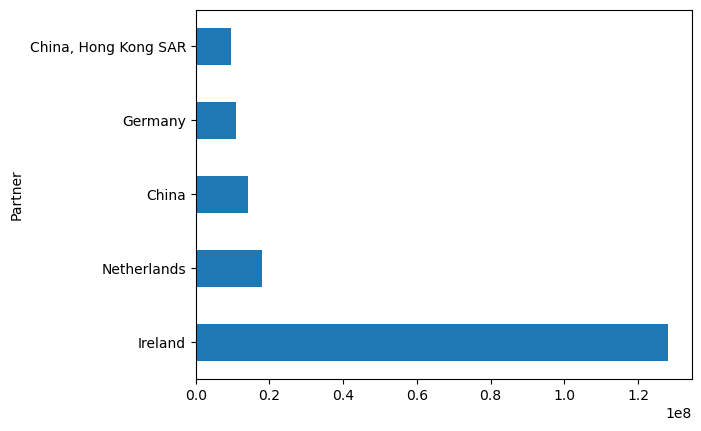

In [207]:
# Regular Exports of  Milk
grouped = exporter.groupby([PARTNER])
totalem = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalem.head(5).plot(kind='barh')

<AxesSubplot:ylabel='Partner'>

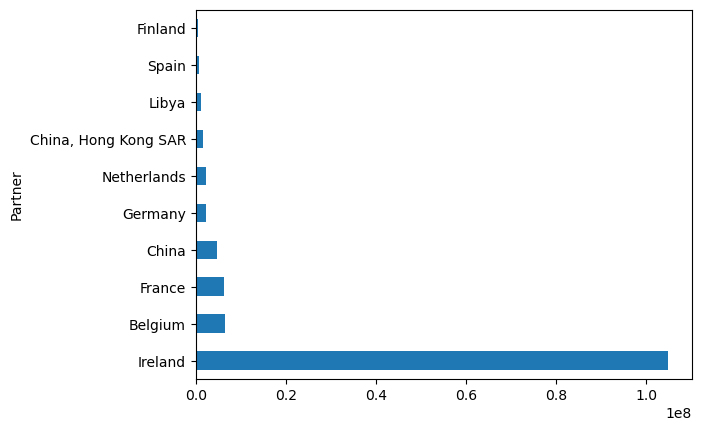

In [208]:
# Unprocessed Milk Export
grouped = unprocessed.groupby([PARTNER])
totalupe = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalupe.head(10).plot(kind='barh')

<AxesSubplot:ylabel='Partner'>

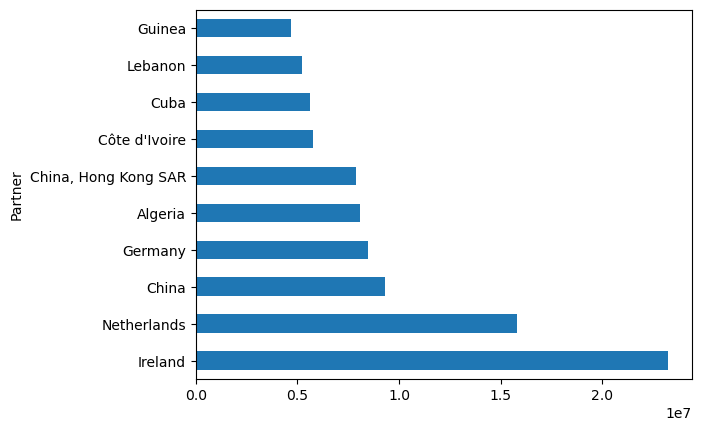

In [209]:
# Processed Milk Export
grouped = processed.groupby([PARTNER])
totalpe = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalpe.head(10).plot(kind='barh')

Q) which countries sell every month both unprocessed and processed milk and cream to the UK?

In [210]:
importer = df[df['Trade Flow'] =='Imports']

In [211]:
def regular(r):
   return len(r) <=12
    
grouped = importer.groupby([PARTNER])
regulars = grouped.filter(regular)

unprocessed = regulars[regulars[COMMODITY] == 'unprocessed']
processed = regulars[regulars[COMMODITY] == 'processed']

<AxesSubplot:ylabel='Partner'>

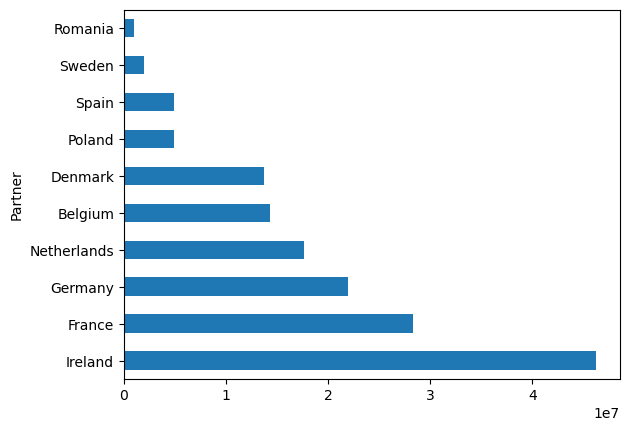

In [212]:
 # Regular Imports of  Milk
grouped = importer.groupby([PARTNER])
totalim = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalim.head(10).plot(kind='barh')

<AxesSubplot:ylabel='Partner'>

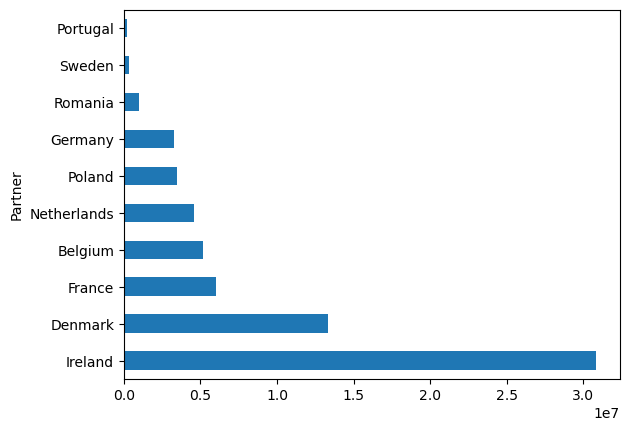

In [213]:
# Unprocessed Milk Imports
grouped = unprocessed.groupby([PARTNER])
totalupi = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalupi.head(10).plot(kind='barh')

<AxesSubplot:ylabel='Partner'>

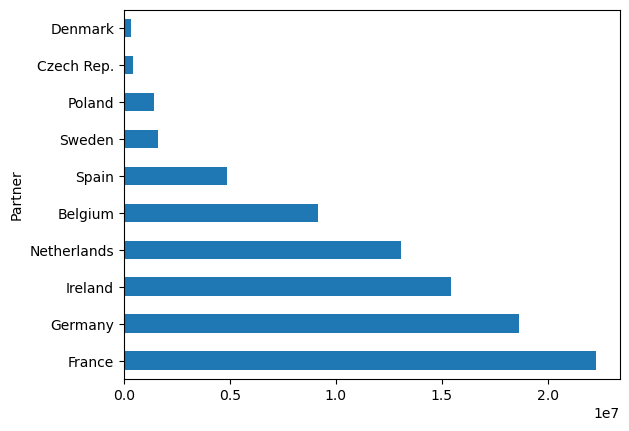

In [214]:
# Processed Milk Imports
grouped = processed.groupby([PARTNER])
totalpi = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalpi.head(10).plot(kind='barh')

Q) Where could the export market be further developed

<AxesSubplot:ylabel='Partner'>

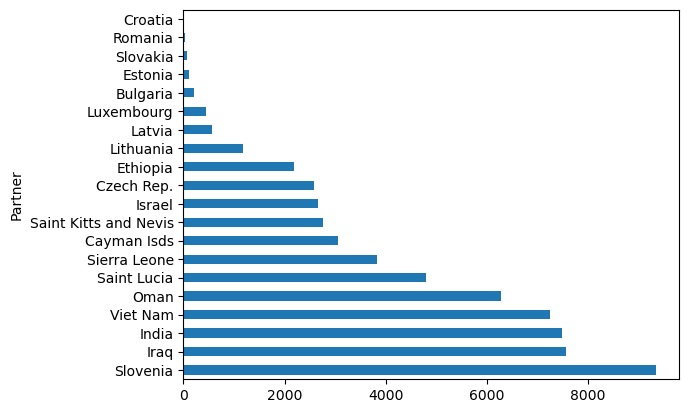

In [215]:
exporter = df[df['Trade Flow'] =='Exports']

grouped = exporter.groupby([PARTNER])
export_td = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
export_td.tail(20).plot(kind='barh')

Q) which countries import the least? Do the figures look realistic?

<AxesSubplot:ylabel='Partner'>

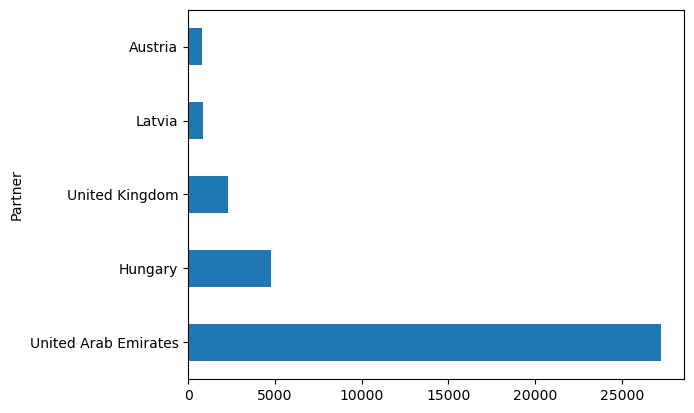

In [216]:
 # least Imports of  Milk
grouped = importer.groupby([PARTNER])
totalim = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalim.tail(5).plot(kind='barh')

Q) What is total amount of exports to and imports from the bi-lateral trade countries? Hint: pivot tables can have ‘marginal’ values.

In [217]:
bi_directional = pd.pivot_table(df,index=[PARTNER], columns=[FLOW], 
                        values=VALUE, aggfunc=sum, margins=True, margins_name='Total')

In [218]:
bi_directional = bi_directional.dropna()

In [219]:
bi_directional

Trade Flow,Exports,Imports,Total
Partner,,,
Austria,56279.0,780.0,57059
Belgium,7209121.0,14325697.0,21534818
Czech Rep.,2590.0,486889.0,489479
Denmark,335068.0,13681759.0,14016827
France,9381762.0,28314091.0,37695853
Germany,10828464.0,21899123.0,32727587
Hungary,71378.0,4762.0,76140
Ireland,128155891.0,46263897.0,174419788
Italy,173689.0,321635.0,495324


# Repeat the whole analysis for January–May 2014 and compare the results.

In [220]:
df = pd.read_csv(r'C:\Users\Jojo3\Downloads\Project 4\comtrade_milk_uk_jan_may_14.csv', dtype={'Commodity Code':str})

# Cleaning

In [221]:
def milkType(code):
    if code == '0401': # neither concentrated nor sweetened
        return 'unprocessed'
    if code == '0402': # concentrated or sweetened
        return 'processed' 
    return 'unknown'

COMMODITY = 'Milk and cream'
df[COMMODITY] = df['Commodity Code'].apply(milkType)
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
df = df[headings]

In [222]:
import pandas as pd
# Convert the 'Period' column to datetime format
df.loc[:, 'Period'] = pd.to_datetime(df['Period'], format='%Y%m')


# Set the 'Period' column as the index
df.set_index('Period', inplace=True)

# Select rows based on a date range
start_date = '2014-01-01'
end_date = '2014-05-31'
selected_rows = df.loc[start_date:end_date]

In [223]:
df = selected_rows

In [224]:
df = df[df['Partner'] != 'World']

Q) Which are the regular exporters?

<AxesSubplot:ylabel='Partner'>

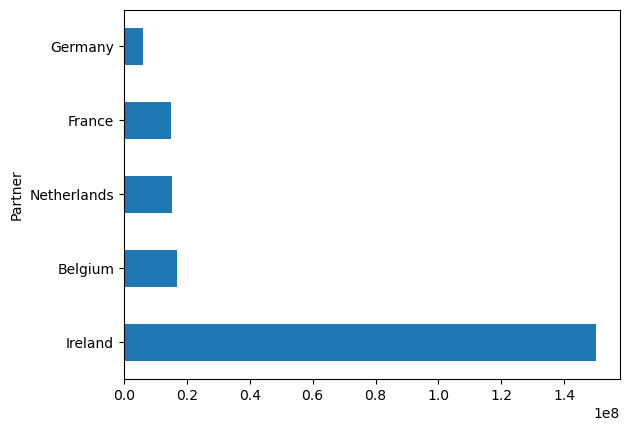

In [225]:
exporter = df[df['Trade Flow'] == 'Exports']

def regular(g):
    return len(g) <= 12

grouped = exporter.groupby(['Partner'])
regulars = grouped.filter(regular)

totalem = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalem.head(5).plot(kind='barh')

Q) which countries sell every month both unprocessed and processed milk and cream to the UK?

<AxesSubplot:ylabel='Partner'>

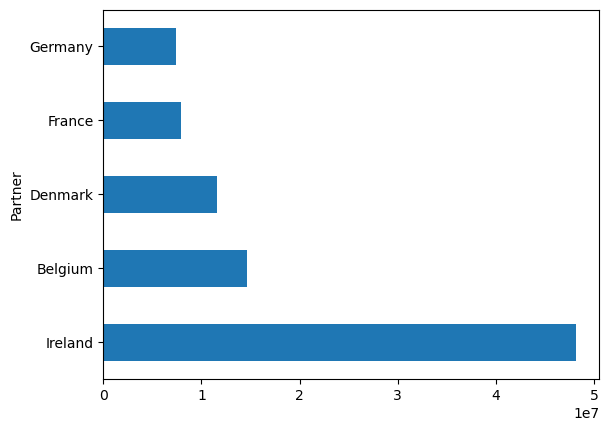

In [226]:
importers = df[df['Trade Flow'] =='Imports']

def regular(g):
    return len(g) <= 12

grouped = importers.groupby(['Partner'])
regulars = grouped.filter(regular)

totalem = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
totalem.head(5).plot(kind='barh')

Q) Where could the export market be further developed

<AxesSubplot:ylabel='Partner'>

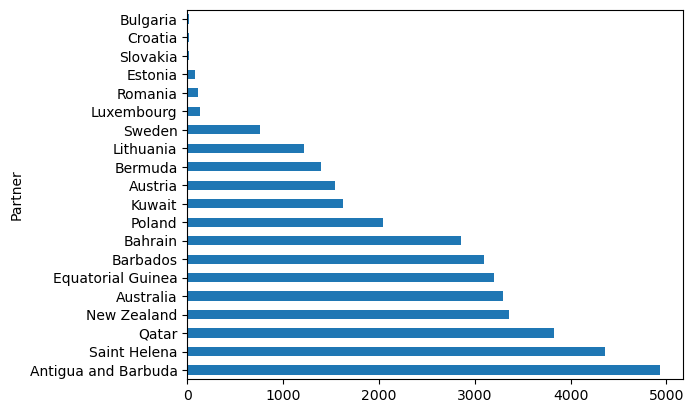

In [227]:
exporter = df[df['Trade Flow'] =='Exports']

grouped = exporter.groupby([PARTNER])
export_td = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
export_td.tail(20).plot(kind='barh')

which countries import the least? Do the figures look realistic?

<AxesSubplot:ylabel='Partner'>

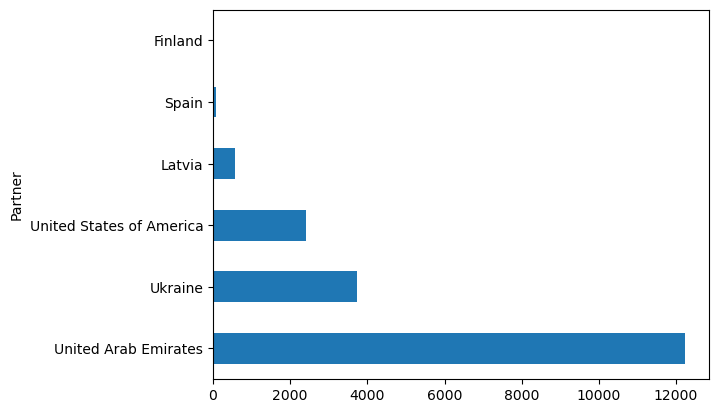

In [228]:
grouped = importers.groupby([PARTNER])
export_td = grouped[VALUE].aggregate(sum).sort_values(inplace=False,ascending=False)
export_td.tail(6).plot(kind='barh')

What is total amount of exports to and imports from the bi-lateral trade countries?

In [229]:
bi_directional = pd.pivot_table(df, index=[PARTNER], columns=[FLOW], values=VALUE, aggfunc=sum, margins=True, margins_name='Total')

In [230]:
bi_directional = bi_directional.dropna()

In [231]:
bi_directional

Trade Flow,Exports,Imports,Total
Partner,,,
Belgium,16865242.0,14675575.0,31540817
Denmark,158086.0,11595750.0,11753836
Finland,718292.0,12.0,718304
France,14932983.0,7932713.0,22865696
Germany,6194922.0,7454641.0,13649563
Ireland,150158156.0,48130281.0,198288437
Italy,5942.0,33742.0,39684
Lithuania,1216.0,39324.0,40540
Netherlands,15284775.0,4761270.0,20046045


# Comparing 2014 and 2015 Trading

In [232]:
te15 = 265029661.0
ti15 = 156483978.0
Total15 = 421513639

te14 = 213417426.0
ti14 = 99726428.0
Total14 = 313143854

print('Total Export difference from 2014 to 2015:',te15  - te14)
print('Total Import difference from 2014 to 2015:',ti15 - ti14)
print('Total Trade difference from 2014 to 2015:',Total15 - Total14)

Total Export difference from 2014 to 2015: 51612235.0
Total Import difference from 2014 to 2015: 56757550.0
Total Trade difference from 2014 to 2015: 108369785
